In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def count_v1(temp_df):
  print('Count of Ham: ',len(temp_df[temp_df['v1'] == 'ham']))
  print('Count of Ham: ',len(temp_df[temp_df['v1'] == 'spam']))

In [56]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [57]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Count of Ham:  4825
Count of Ham:  747


Text(0.5, 1.0, 'Number of ham and spam messages')

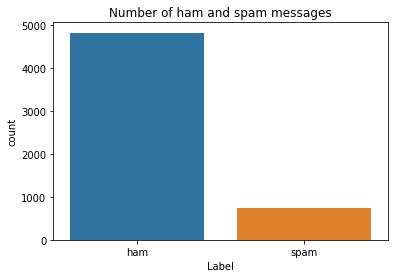

In [75]:
count_v1(df)
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [76]:
df_ham = df[df['v1'] == 'ham']
df_spam = df[df['v1'] == 'spam']
print('Length of Ham:',len(df_ham))
print('Length of Spam:',len(df_spam))

Length of Ham: 4825
Length of Spam: 747


In [0]:
#Random Oversampling
import random
oversample_li_index = [random.choice(df_spam.index) for i in range(len(df_spam))]
oversample_df = df_spam[df_spam.index.isin(oversample_li_index)]
oversample_df = df.append(oversample_df)

Count of Ham:  4825
Count of Ham:  1225


Text(0.5, 1.0, 'Number of ham and spam messages (oversampled)')

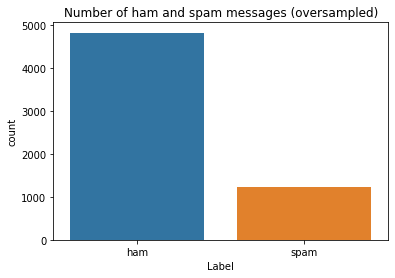

In [78]:
count_v1(oversample_df)
sns.countplot(oversample_df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages (oversampled)')

In [0]:
#random Undersampling
undersampled_li_index = [random.choice(df_ham.index) for i in range(2500)]
undersampled_df = df.drop(df.index[undersampled_li_index])

Count of Ham:  2878
Count of Ham:  747


Text(0.5, 1.0, 'Number of ham and spam messages (undersampled)')

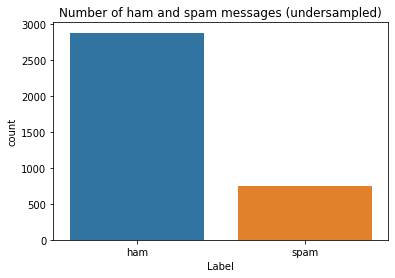

In [79]:
count_v1(undersampled_df)
sns.countplot(undersampled_df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages (undersampled)')

In [0]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

#oversampled
o_X = oversample_df.v2
o_Y = oversample_df.v1
le = LabelEncoder()
o_Y = le.fit_transform(o_Y)
o_Y = o_Y.reshape(-1,1)

#undersampled
u_X = undersampled_df.v2
u_Y = undersampled_df.v1
le = LabelEncoder()
u_Y = le.fit_transform(u_Y)
u_Y = u_Y.reshape(-1,1)


In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

#oversampled
o_X_train,o_X_test,o_Y_train,o_Y_test = train_test_split(o_X,o_Y,test_size=0.15)

#undersampled
u_X_train,u_X_test,u_Y_train,u_Y_test = train_test_split(u_X,u_Y,test_size=0.15)

In [0]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
#oversampled
o_tok = Tokenizer(num_words=max_words)
o_tok.fit_on_texts(o_X_train)
o_sequences = o_tok.texts_to_sequences(o_X_train)
o_sequences_matrix = sequence.pad_sequences(o_sequences,maxlen=max_len)

In [0]:
#undersampled
u_tok = Tokenizer(num_words=max_words)
u_tok.fit_on_texts(u_X_train)
u_sequences = u_tok.texts_to_sequences(u_X_train)
u_sequences_matrix = sequence.pad_sequences(u_sequences,maxlen=max_len)

In [0]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [88]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#oversampled
o_model = RNN()
o_model.summary()
o_model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#underampled
u_model = RNN()
u_model.summary()
u_model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [89]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

#oversampled
o_model.fit(o_sequences_matrix,o_Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

#undersampled
u_model.fit(u_sequences_matrix,u_Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.3248 - accuracy: 0.8809 - val_loss: 0.1359 - val_accuracy: 0.9641
Epoch 2/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0817 - accuracy: 0.9815 - val_loss: 0.0566 - val_accuracy: 0.9852
Epoch 3/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0356 - accuracy: 0.9900 - val_loss: 0.0554 - val_accuracy: 0.9852
Epoch 4/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0667 - val_accuracy: 0.9831
Train on 4113 samples, validate on 1029 samples
Epoch 1/10
4113/4113 [==============================] - 8s 2ms/step - loss: 0.3448 - accuracy: 0.8631 - val_loss: 0.1996 - val_accuracy: 0.9388
Epoch 2/10
4113/4113 [==============================] - 7s 2ms/step - loss: 0.0785 - accuracy: 0.9788 - val_loss: 0.0995 - val_accuracy: 0.9660
Epoch 3/10
4113/4113 [===================

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

#oversampled
o_test_sequences = o_tok.texts_to_sequences(o_X_test)
o_test_sequences_matrix = sequence.pad_sequences(o_test_sequences,maxlen=max_len)

#undersampled
u_test_sequences = u_tok.texts_to_sequences(u_X_test)
u_test_sequences_matrix = sequence.pad_sequences(u_test_sequences,maxlen=max_len)

In [91]:
accr = model.evaluate(test_sequences_matrix,Y_test)

#overampled
o_accr = o_model.evaluate(o_test_sequences_matrix,o_Y_test)

#underampled
u_accr = u_model.evaluate(u_test_sequences_matrix,u_Y_test)

544/544 [==============================] - 0s 585us/step


In [93]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

print('\nOverampled')
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(o_accr[0],o_accr[1]))

print('\nUndersampled')
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(u_accr[0],u_accr[1]))

Test set
  Loss: 0.120
  Accuracy: 0.974

Overampled
Test set
  Loss: 0.068
  Accuracy: 0.979

Undersampled
Test set
  Loss: 0.024
  Accuracy: 0.994
